In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Spill_Incidents.csv')

### Finding Which Locations Had The Most Spills

In [7]:
from location_clean import location_clean

# get rid of unnecessary columns and change units to all be gallons
pd.set_option('display.precision', 1)
location_data = location_clean(data)
location_data.head(5)

,Locality,County,Quantity,Units
97994,COLONIE COHOES LATHAM WATERFOR,Albany,1.4e+10,Gallons
462419,BALDWINSVILLE,Onondaga,2.0e+08,Gallons
478157,BRONX,Bronx,1.5e+08,Gallons
472443,NEW YORK CITY,Queens,1.0e+08,Gallons
130596,EAST SYRACUSE,Onondaga,1.0e+08,Gallons


In [8]:
from total_spill_location import total_spill_location

# gets total oil spilled by locatlity and county
location_total = total_spill_location(location_data)

location_total.head(5)

,Locality,County,Total Spilled (Gallons)
0,COLONIE COHOES LATHAM WATERFOR,Albany,1.4e+10
1,BALDWINSVILLE,Onondaga,2.0e+08
2,BRONX,Bronx,1.5e+08
3,NEW YORK CITY,Queens,1.0e+08
4,EAST SYRACUSE,Onondaga,1.0e+08


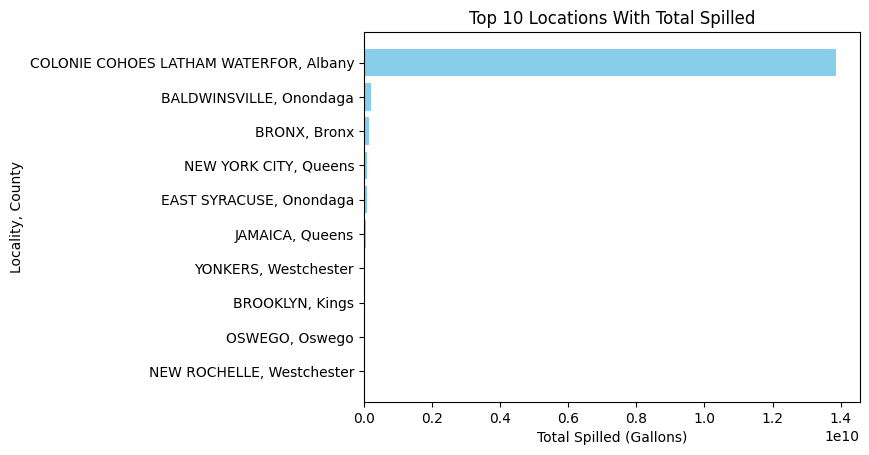

In [9]:
x = (location_total['Locality'][0:10] + ', ' + location_total['County'][0:10]).loc[::-1]
y = location_total['Total Spilled (Gallons)'][0:10].loc[::-1]
plt.barh(x,y, color='skyblue')
plt.ylabel("Locality, County")
plt.xlabel("Total Spilled (Gallons)")
plt.title("Top 10 Locations With Total Spilled")
plt.show()

Some locations may be biased since there may be a single really big spill but actually spills didn't happend very often. Let's instead look at the frequency of spills.

In [10]:
from location_freq import location_freq

# another sub-data set that tracks frequency of spills instead of total gallons
location_freq = location_freq(location_data)
location_freq.head(10)

,Locality,County,count
0,BROOKLYN,Kings,21649
1,MANHATTAN,New York,15279
2,BRONX,Bronx,13128
3,QUEENS,Queens,11214
4,ROCHESTER,Monroe,9047
5,BUFFALO,Erie,7240
6,STATEN ISLAND,Richmond,6590
7,YONKERS,Westchester,5608
8,WHITE PLAINS,Westchester,4783
9,SYRACUSE,Onondaga,4657


Some spills had very small spills that actually aren't that worrysome so next let's only count the top percentage of spills to account for this.

In [11]:
from location_freq import location_freq

# only use top 75% of values that have quantity > 0
top_location_freq = location_data.copy()
top_location_freq = top_location_freq[top_location_freq['Quantity'] != 0]
top_location_freq = top_location_freq.sort_values(['Quantity'], ascending=False)
top_location_freq = top_location_freq.reset_index()
top_location_freq = top_location_freq.drop(['index'], axis='columns')
top_location_freq = top_location_freq.head(3* (top_location_freq.shape[0] // 4))

# frequency of top 75% oil spills
top_location_freq = location_freq(top_location_freq)
top_location_freq.head(10)

,Locality,County,count
0,MANHATTAN,New York,6951
1,BROOKLYN,Kings,6662
2,BRONX,Bronx,4795
3,QUEENS,Queens,4464
4,ROCHESTER,Monroe,3658
5,BUFFALO,Erie,2258
6,SYRACUSE,Onondaga,1880
7,STATEN ISLAND,Richmond,1820
8,JAMAICA,Queens,1787
9,WHITE PLAINS,Westchester,1635


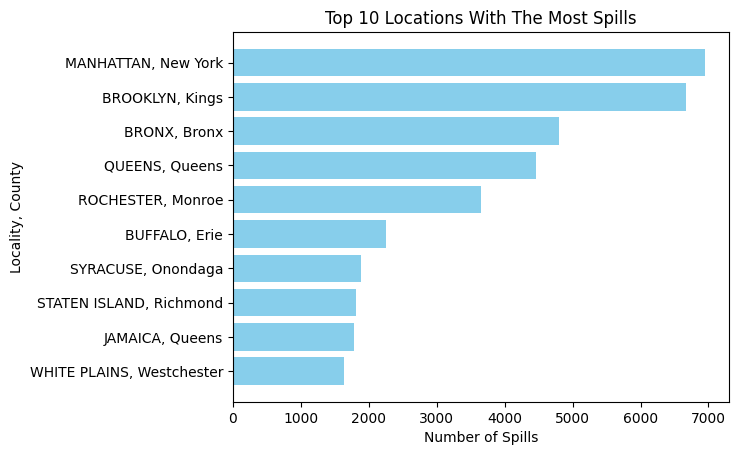

In [12]:
x = (top_location_freq['Locality'][0:10] + ', ' + top_location_freq['County'][0:10]).loc[::-1]
y = top_location_freq['count'][0:10].loc[::-1]
plt.barh(x,y, color='skyblue')
plt.ylabel("Locality, County")
plt.xlabel("Number of Spills")
plt.title("Top 10 Locations With The Most Spills")
plt.show()

### Find What Factors Contribute The Most To Spills

In [13]:
# Data Cleaning and Modification
# Remove records with missing 'Units'
clean_data = data.dropna(subset=['Units']).copy()

# Combine "Unknown" and "Other" into "Unknown"
clean_data['Contributing Factor'] = clean_data['Contributing Factor'].replace(['Other'], 'Unknown')

# compute sum and average
data_cleaned = clean_data.groupby(['Contributing Factor', 'Units'])['Quantity'].sum().reset_index()
avg_data_cleaned = clean_data.groupby(['Contributing Factor', 'Units'])['Quantity'].mean().reset_index()

# Filter data for gallons only
gallons_data_cleaned = data_cleaned[data_cleaned['Units'] == 'Gallons']
gallons_average_data_cleaned = avg_data_cleaned[avg_data_cleaned['Units'] == 'Gallons']

# create plots for total quantities
def create_plot(data, title_prefix='Top'):
    data_sorted = data.sort_values(by='Quantity', ascending=False).head(10)  # Show top 10 
    factors = data_sorted['Contributing Factor']
    quantities = data_sorted['Quantity']
    
    plt.figure(figsize=(10, 6))
    plt.barh(factors, quantities, color='red')
    plt.xlabel('Quantity in Gallons')
    plt.ylabel('Contributing Factor')
    plt.title(f'{title_prefix} Contributing Factors by Total Quantity in Gallons')
    plt.tight_layout()
    plt.show()

def create_average_plot(data):
    data_sorted = data.sort_values(by='Quantity', ascending=False).head(10)  # Show top 10 
    factors = data_sorted['Contributing Factor']
    averages = data_sorted['Quantity']
    
    plt.figure(figsize=(10, 6))
    plt.barh(factors, averages, color='red')
    plt.xlabel('Average Quantity in Gallons')
    plt.ylabel('Contributing Factor')
    plt.title('Top Contributing Factors by Average Quantity in Gallons')
    plt.tight_layout()
    plt.show()

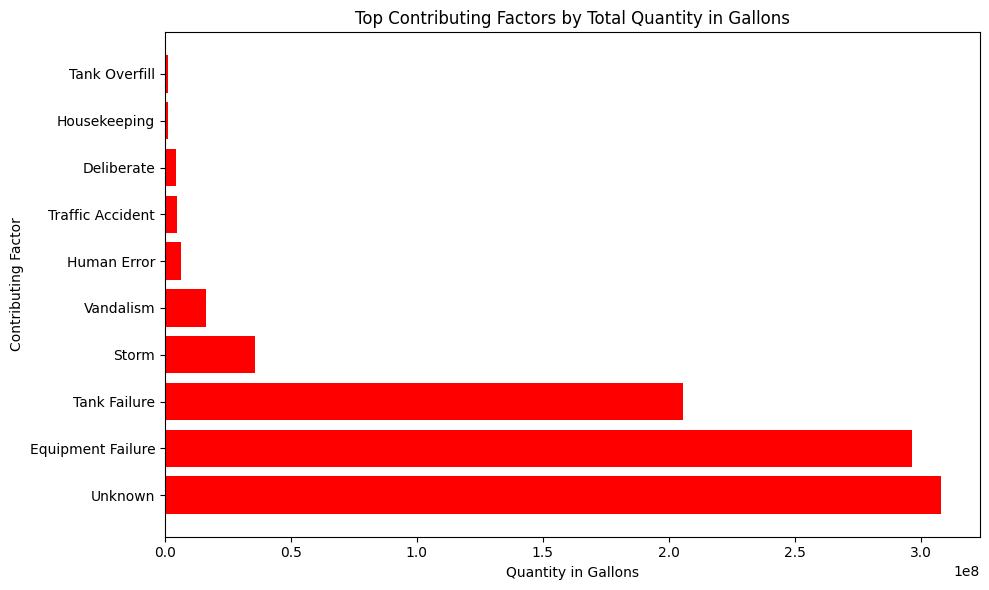

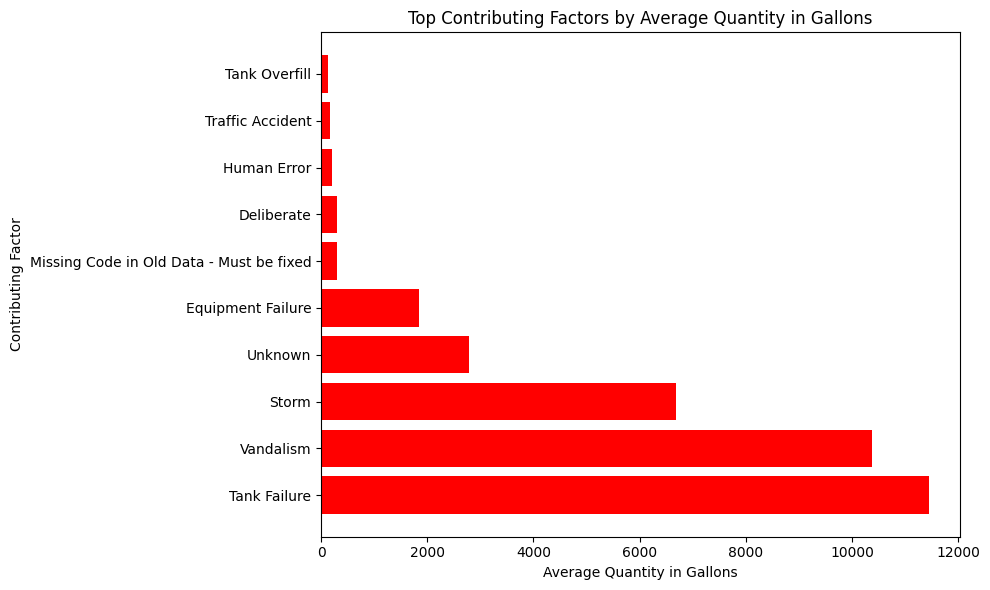

In [14]:
create_plot(gallons_data_cleaned)
create_average_plot(gallons_average_data_cleaned)